## FE - Final Work (Diagnosis)

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression, Ridge, Lasso
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate

import xgboost

%matplotlib inline

#### 1. Загрузить файл data_breast.csv

In [14]:
raw = pd.read_csv('data_breast.csv')

In [15]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [16]:
raw.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


#### 2. Рассчитать основные статистики

In [17]:
raw.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


#### 3. Пропущенные значения

In [18]:
#Дропнем бесполезную id и пустую Unnamed: 32
raw = raw.drop(['Unnamed: 32', 'id'], 1)

In [19]:
#Приведем к бинарным значениям целевой столбец Диагноз
raw.diagnosis = [1 if x == 'M' else 0 for x in raw.diagnosis]
raw.diagnosis.value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

#### 4. Корр матрица

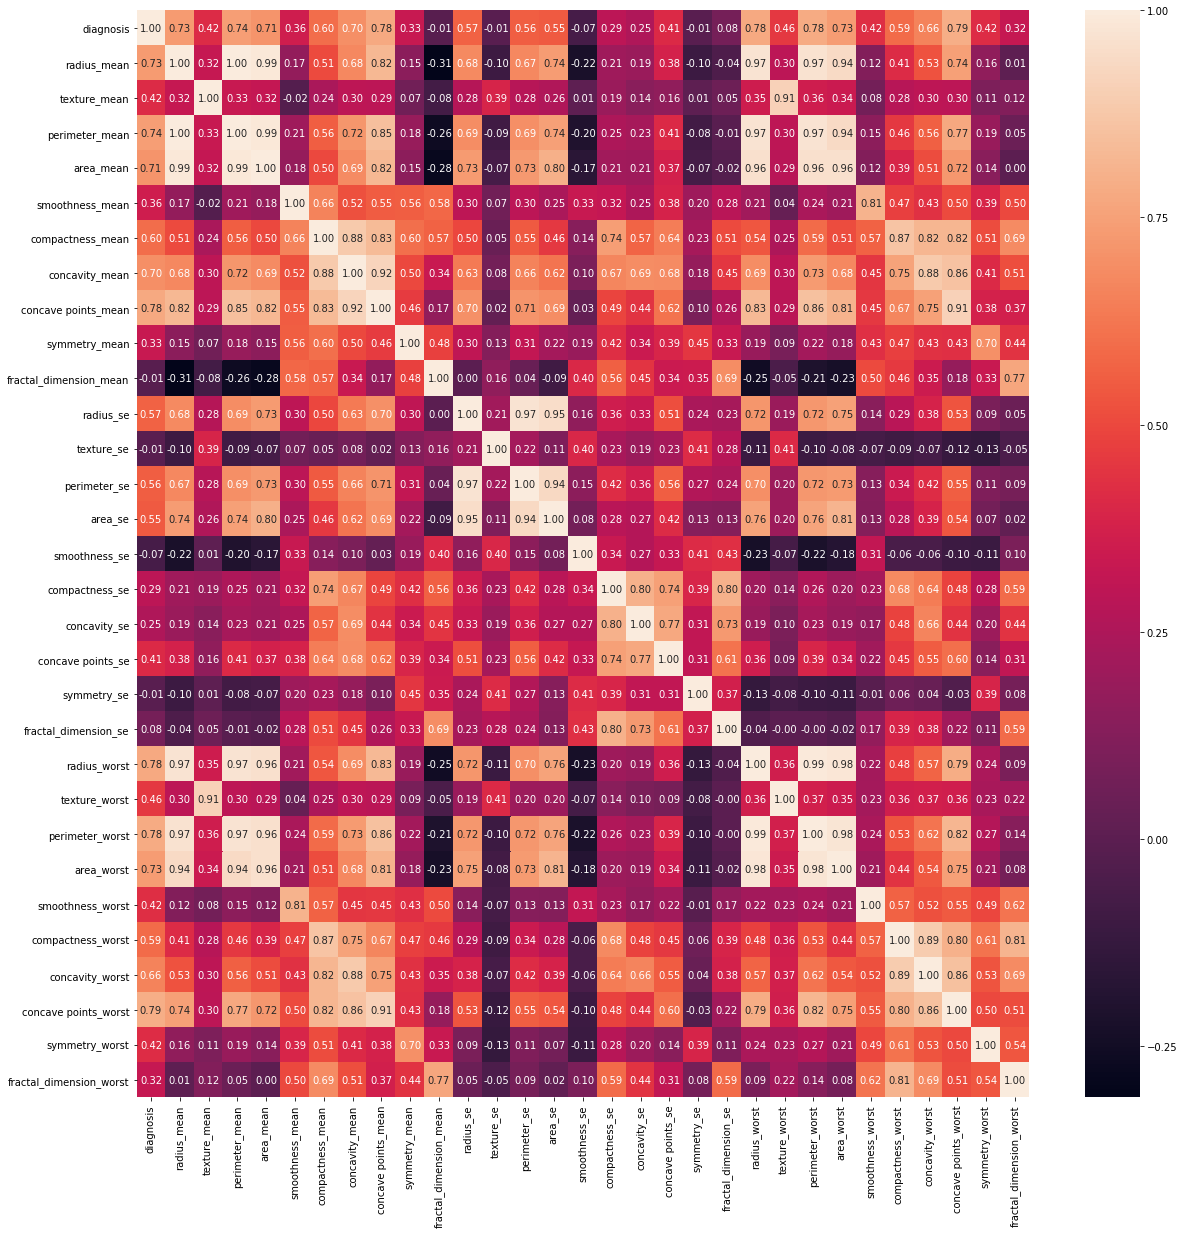

In [21]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(raw.corr(),annot=True, fmt='.2f',ax=ax)

#### 5. Визуализация

In [54]:
#Подготовим все к ШОУ
diag = raw.diagnosis
data = raw.drop('diagnosis',1)

In [64]:
data.shape

(569, 30)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

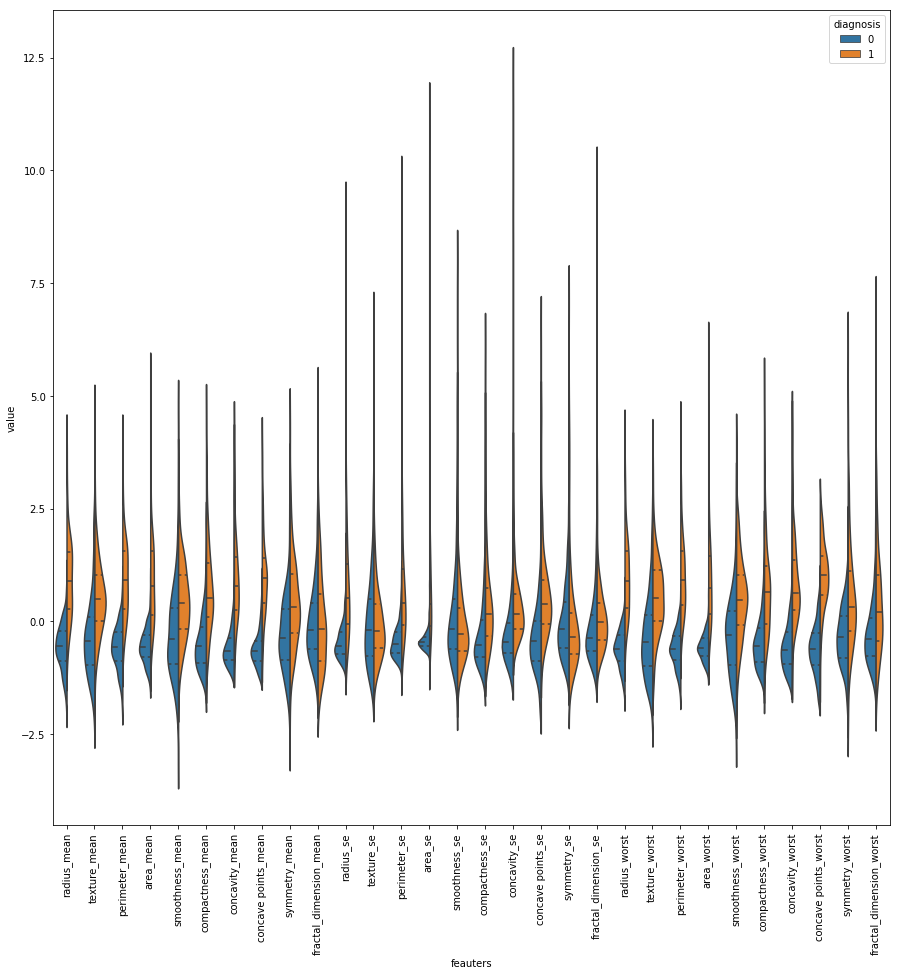

In [65]:
#Тырим идеи с кэггла  и чуть совершенствуем
data_standart = (data - data.mean()) / (data.std())
data_fine = pd.concat([diag, data_standart.iloc[:,0:30]], axis=1)
data_fine = pd.melt(data_fine, id_vars='diagnosis', var_name='feauters', value_name='value')
plt.figure(figsize=(15,15))
sns.violinplot(x='feauters', y='value', hue='diagnosis', data=data_fine, split=True, inner='quart')
plt.xticks(rotation=90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 <a list of 30 Text xticklabel objects>)

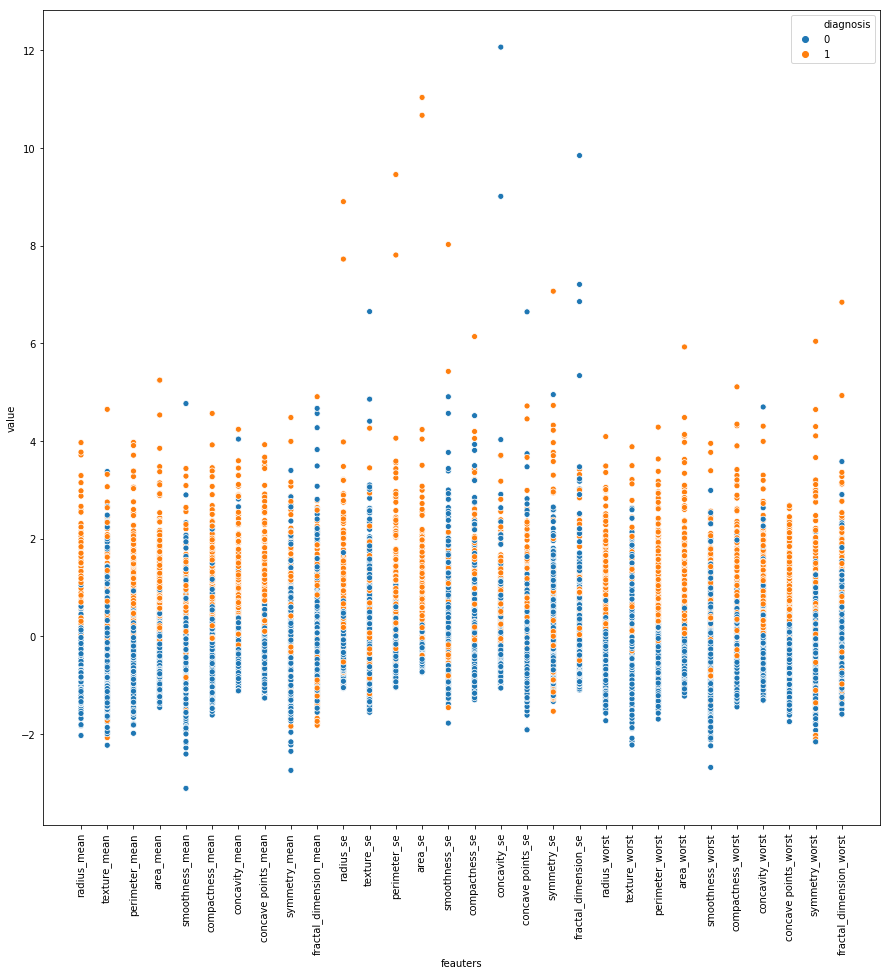

In [68]:
plt.figure(figsize=(15,15))
sns.scatterplot(x='feauters', y='value', hue='diagnosis', data=data_fine)
plt.xticks(rotation=90)

/home/eli/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


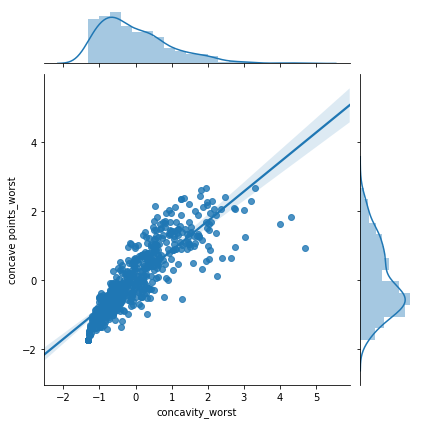

In [79]:
sns.jointplot(data_standart.loc[:,'concavity_worst'], data_standart.loc[:, 'concave points_worst'], kind='regg')

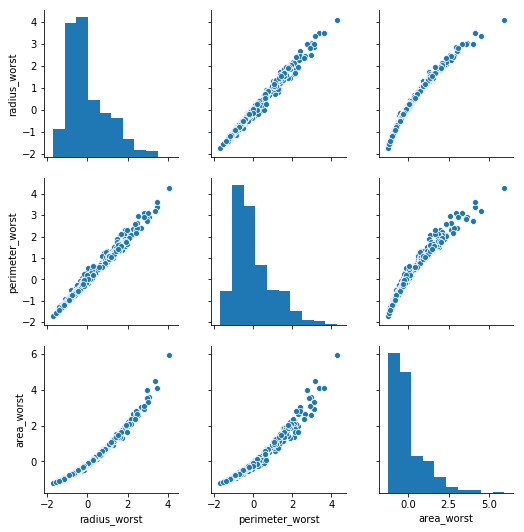

In [80]:
data_pairplot = data_standart.loc[:, ['radius_worst', 'perimeter_worst', 'area_worst']]
sns.pairplot(data_pairplot)

#### 6. Взаимосвязи

In [35]:
#Список колонок для тестирования связей без диагноза
cols = raw.drop('diagnosis', 1).columns
cols

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [39]:
#Что бы сэкономить время, затестим гипотезы сразу для всего через t-test
t_result = {}
for col in cols:
    bad_res = raw.where(raw.diagnosis==1).dropna()[col]
    good_res = raw.where(raw.diagnosis==0).dropna()[col]
    t_result[col] = stats.ttest_ind(bad_res, good_res)

In [48]:
itogo = pd.DataFrame.from_dict(t_result, orient='Index')
itogo['gipotesa'] = ['ALARM' if x < 0.05 else 'OK' for x in itogo.pvalue]
itogo

,statistic,pvalue,gipotesa
radius_mean,25.435822,8.465941e-96,ALARM
texture_mean,10.867201,4.058636e-25,ALARM
perimeter_mean,26.405213,8.436251e-101,ALARM
area_mean,23.938687,4.734564e-88,ALARM
smoothness_mean,9.146099,1.051850e-18,ALARM
compactness_mean,17.698392,3.938263e-56,ALARM
concavity_mean,23.103963,9.966556e-84,ALARM
concave points_mean,29.354319,7.101150e-116,ALARM
symmetry_mean,8.338312,5.733384e-16,ALARM
fractal_dimension_mean,-0.305711,7.599368e-01,OK


In [49]:
#Из ттеста видно что большинство факторов (которые хорошо видно и на корр матрице) влияют на итоговый диагноз

#### 7. Стратегия FS

In [50]:
#Чот сложно представить тут стратегию с увеличением количества фичей.
#Категориальных нет, явно есть пара бессмысленных столбцов.
#Будем резать!

#### 8. FS

Text(0.5, 0, 'N COMPONENTS')

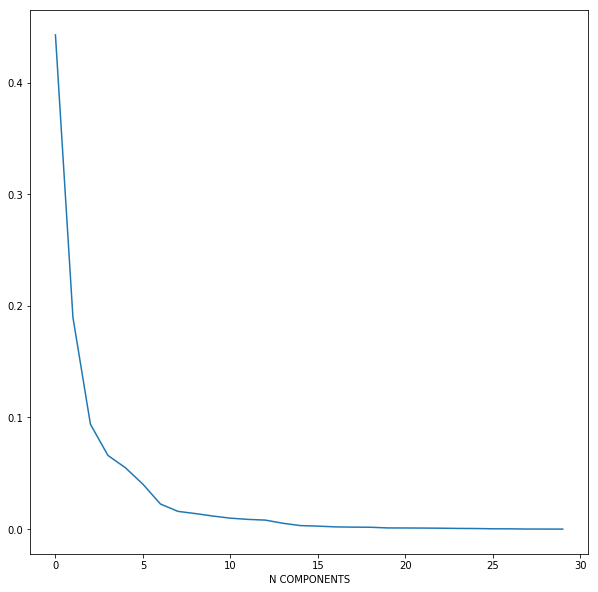

In [85]:
#Посмотрим сколько фич мы оставим после PCA. Подготовим сразу трейн и тест и нормализуем
pca = PCA()
pca.fit(data_standart)

plt.figure(1, figsize=(10, 10))
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('N COMPONENTS')

In [96]:
#Считаю что 6 фич все объясняют!
rf = RandomForestClassifier()
rfe = RFE(estimator=rf, n_features_to_select=6, step=1)
rfe = rfe.fit(data_standart, diag)
FS_RF = data_standart.columns[rfe.support_]
FS_RF

/home/eli/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/eli/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/eli/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/eli/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/eli/anaconda3/lib/python3.7/site-packages/sklearn/

Index(['texture_mean', 'concavity_mean', 'radius_worst', 'perimeter_worst',
       'area_worst', 'concave points_worst'],
      dtype='object')

#### 9. Предсказания

#### 10. Метрики